In [1]:
import os, sys
from pathlib import Path
import matplotlib.pyplot as plt 

# 1. import the Experiment object from LAMP 
from LAMP import Experiment

ROOT_FOLDER = str(Path.cwd().parent.parent) #Path.cwd().parent.parent#Path(__file__).resolve().parents[1] # absolute path to the experiment config files and other subfolders; 2 directories up in this case (assuming script in in ./scripts/eSpec/script.py)
sys.path.append(ROOT_FOLDER)
# import diagnostics.ESpec_
ex = Experiment(ROOT_FOLDER)


Initializing LAMP, version 0.1.0
Using (User) DAQ: Fireball_DAQ_Bdot
Adding (User) Diagnostic: HRM5 [ESpec_]
Adding (User) Diagnostic: HRM6 [ESpec_]
Adding (User) Diagnostic: Template [Template]
Adding (User) Diagnostic: SCOPE1 [BDot]
Adding (User) Diagnostic: SCOPE2 [BDot]


In [2]:
template = ex.get_diagnostic('SCOPE1')

print(template.config)
print(ex.config)


{'type': 'BDot', 'data_folder': '/scope_pool05720010/', 'data_stem': 'scope1', 'data_type': 'scope', 'data_ext': '.csv', 'calib_subfolder': './BDot/', 'calib_file': 'SCOPE1_calibs.toml', 'name': 'SCOPE1'}
{'setup': {'DAQ': 'Fireball_DAQ_Bdot'}, 'paths': {'calibs_folder': './calibs/', 'user_diagnostics': 'diagnostics.', 'user_DAQs': 'DAQs.', 'data_folder': '/eos/project/h/hiradmat/HRMT Experiments/2025/HRMT68 - FIREBALL 3/FB3 repository/HRMT68_data/', 'root': PosixPath('/eos/home-i03/m/mmeloper/SWAN_projects/Fireball_III_analysis'), 'local_config': PosixPath('/eos/home-i03/m/mmeloper/SWAN_projects/Fireball_III_analysis/local.toml'), 'global_config': PosixPath('/eos/home-i03/m/mmeloper/SWAN_projects/Fireball_III_analysis/global.toml')}}


In [10]:
# 5. plot some processed data
#devices[device].get_proc_shot(shot_dict, calib_id=calib_ids[device])
# shot_dict = {'timeframe': ['20260212','20260218']}
# shot_dict = {'timeframe': ['20260212','20260218']}
shot_dict = {'timeframe': ['20250605145706','20250605145730']}
shot_data = template.get_scope_data(shot_dict)#, calib_id=calib_ids[device], debug=True)

Looking for files with timestamps between 20250605145706 and 20250605145730 in /eos/project/h/hiradmat/HRMT Experiments/2025/HRMT68 - FIREBALL 3/FB3 repository/HRMT68_data/scope_pool05720010
scope
/eos/project/h/hiradmat/HRMT Experiments/2025/HRMT68 - FIREBALL 3/FB3 repository/HRMT68_data/scope_pool05720010/scope1__ALL_20250605145706753.csv
Loading data from /eos/project/h/hiradmat/HRMT Experiments/2025/HRMT68 - FIREBALL 3/FB3 repository/HRMT68_data/scope_pool05720010/scope1__ALL_20250605145706753.csv with file_type scope in Fireball_DAQ DAQ.
scope
/eos/project/h/hiradmat/HRMT Experiments/2025/HRMT68 - FIREBALL 3/FB3 repository/HRMT68_data/scope_pool05720010/scope1__ALL_20250605145730752.csv
Loading data from /eos/project/h/hiradmat/HRMT Experiments/2025/HRMT68 - FIREBALL 3/FB3 repository/HRMT68_data/scope_pool05720010/scope1__ALL_20250605145730752.csv with file_type scope in Fireball_DAQ DAQ.


In [11]:
shot_data

[{'time': array([-8.9961250e-08, -8.9921250e-08, -8.9881250e-08, ...,
          1.0991875e-07,  1.0995875e-07,  1.0999875e-07], shape=(5000,)),
  'channels': array([[0.04      , 0.0396875 , 0.03921875],
         [0.04      , 0.0403125 , 0.040625  ],
         [0.04      , 0.0396875 , 0.039375  ],
         ...,
         [0.04      , 0.041875  , 0.04      ],
         [0.04      , 0.03703125, 0.04015625],
         [0.04      , 0.045625  , 0.03984375]], shape=(5000, 3)),
  'channel_names': ['CH1', 'CH3', 'CH4'],
  'N': 5000,
  'dt': 4e-11},
 {'time': array([-8.9961250e-08, -8.9921250e-08, -8.9881250e-08, ...,
          1.0991875e-07,  1.0995875e-07,  1.0999875e-07], shape=(5000,)),
  'channels': array([[ 0.04      ,  0.0003125 , -0.0465625 ],
         [ 0.04      , -0.0003125 , -0.0171875 ],
         [ 0.04      ,  0.00015625,  0.0046875 ],
         ...,
         [ 0.        , -0.0009375 ,  0.02203125],
         [ 0.        ,  0.00125   ,  0.0453125 ],
         [ 0.00015625, -0.001875  ,  0

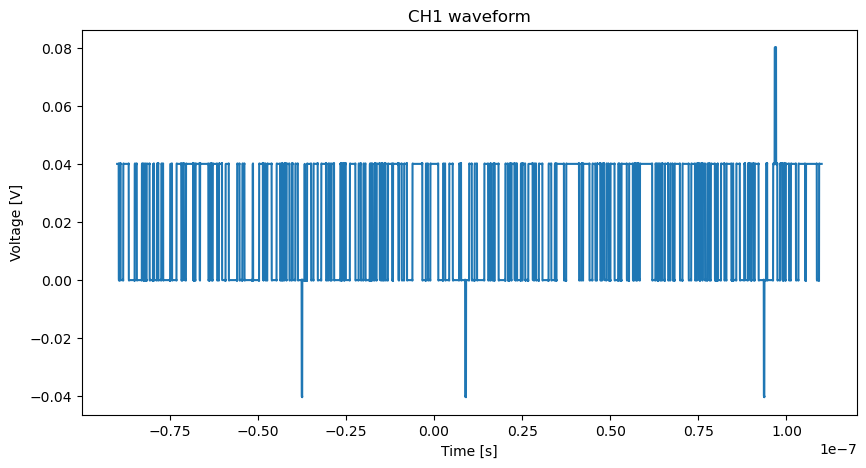

In [13]:
plt.figure(figsize=(10, 5))  # set figure size
plt.plot(shot_data[0]['time'], shot_data[0]['channels'][:, 0])
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('CH1 waveform')  # optional
plt.show()

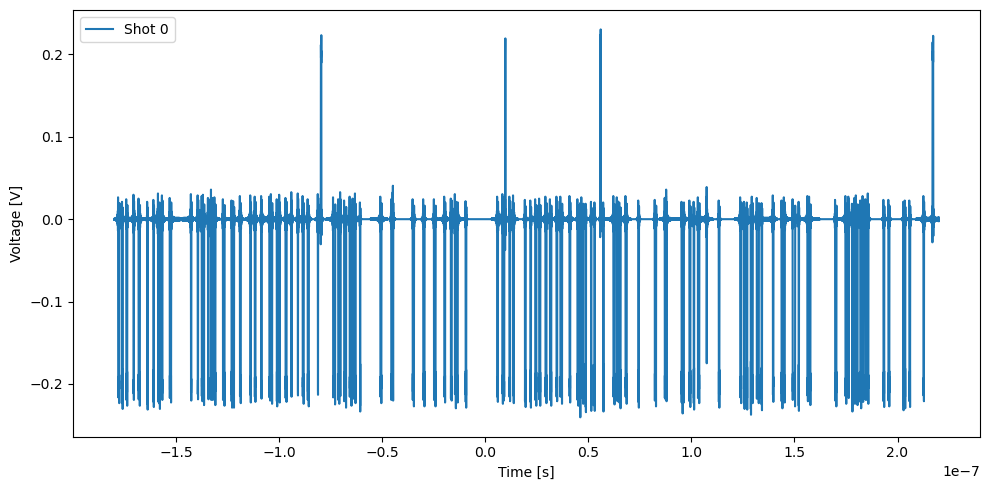

In [6]:
template.plot_scope(shot_data[0], channels=['CH2'])

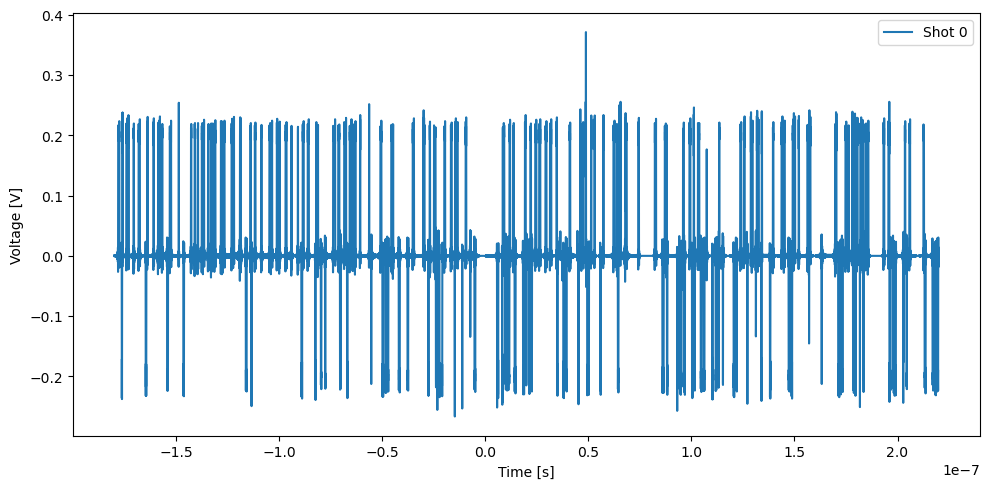

In [7]:
template.plot_scope(shot_data[0], subtract=('CH3', 'CH2'))

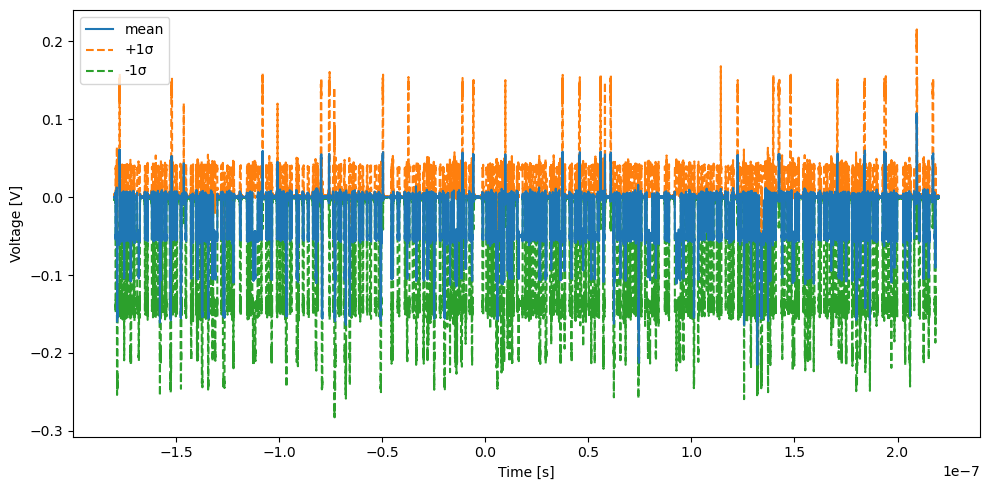

In [8]:
template.plot_scope(shot_data, channels=['CH2'], average=True, show_error=True)